# ANALYSIS OF URBAN COMPANY - SIMRITHA R

## 1. WEB SCRAPPING

In [ ]:
# Importing important libraries.
from bs4 import BeautifulSoup
import requests 
import pandas as pd

In [ ]:
# Creating a function to loop through the review pages and scrap the data
names = []
dates = []
rates = []
comments = []

for i in range(25001, 25500):
    
    urls = f"https://www.urbancompany.com/reviews?p={i}" 
    ct = requests.get(urls)
    soup = BeautifulSoup(ct.content)


    coms = soup.find_all("div", class_ ="ReviewPageReview__topInfo--3ibra")


    for com in coms:
        name = com.find("span", class_ = "ellipsis").text 
        date = com.find("span", class_ = "ReviewPageReview__reviewDate--3tC00").text    
        ratings = com.find("div", class_ = "StarRatingSEO__ratingBox--3MqzX StarRatingSEO__ratingBoxSmall--4Nhn8").text
        reviews = com.find("div", class_ = "ReviewPageReview__seoLinkDiv--2RnCy")
        if reviews is None:
            comments.append("None")
        else:
            comments.append(reviews.text)
            

        names.append(name)
        dates.append(date)
        rates.append(ratings)

In [ ]:
Services = []
Places = []

for i in comments:
    
    if i != "None":
        services,place=i.split(" in ")
        Services.append(services)
        Places.append(place)
        
    elif i == "None":
        Services.append("None")
        Places.append("None")

In [ ]:
Country = []
City = []
for i in Places:
    
    if i == "None":
        City.append("None")
        Country.append("None")
        
    elif i != "None":
        city,country=i.split(", ")
        Country.append(country)
        City.append(city)

In [ ]:
df = pd.DataFrame()

In [ ]:
df["Dates"] = dates
df["Names"] = names
df["Ratings"] = rates
df["Services"] = Services
df["City"] = City
df["Counrty"] = Country
df["Comments"] = comments

In [ ]:
df.to_excel("output25001_25500.xlsx")

## 2. DATA CLEANING

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel("output_simritha.xlsx")

In [4]:
data.head()

,S.No,Dates,Names,Ratings,Services,City,Counrty,Comments
0,1,"29 March, 2022",urvashi,5.0,None,None,None,None
1,2,"29 March, 2022",Aakash Gupta,5.0,None,None,None,None
2,3,"29 March, 2022",Anuja Dhakras,5.0,Massage Therapists At Home For Women,Mumbai,India,Massage Therapists At Home For Women in Mumbai...
3,4,"29 March, 2022",Preeti Pareek Jani,5.0,Beauty Service Professionals,Mumbai,India,"Beauty Service Professionals in Mumbai, India"
4,5,"29 March, 2022",Aman Khajuria,5.0,Electricians,Gurgaon,India,"Electricians in Gurgaon, India"


In [5]:
data.rename(columns={'Counrty':'Country'},inplace='true')

In [6]:
# Replacing the 'None' with NaN value
data.replace('None',np.nan, inplace=True)

In [7]:
data.head()

,S.No,Dates,Names,Ratings,Services,City,Country,Comments
0,1,"29 March, 2022",urvashi,5.0,NaN,NaN,NaN,NaN
1,2,"29 March, 2022",Aakash Gupta,5.0,NaN,NaN,NaN,NaN
2,3,"29 March, 2022",Anuja Dhakras,5.0,Massage Therapists At Home For Women,Mumbai,India,Massage Therapists At Home For Women in Mumbai...
3,4,"29 March, 2022",Preeti Pareek Jani,5.0,Beauty Service Professionals,Mumbai,India,"Beauty Service Professionals in Mumbai, India"
4,5,"29 March, 2022",Aman Khajuria,5.0,Electricians,Gurgaon,India,"Electricians in Gurgaon, India"


In [8]:
# Droping all the rows which has null values
data=data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58643 entries, 2 to 99389
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      58643 non-null  int64  
 1   Dates     58643 non-null  object 
 2   Names     58643 non-null  object 
 3   Ratings   58643 non-null  float64
 4   Services  58643 non-null  object 
 5   City      58643 non-null  object 
 6   Country   58643 non-null  object 
 7   Comments  58643 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.0+ MB


In [10]:
# Conevrting the data.Dates into a Datetime variable
data['Dates']=pd.to_datetime(data['Dates'])

In [11]:
data.head()

,S.No,Dates,Names,Ratings,Services,City,Country,Comments
2,3,2022-03-29,Anuja Dhakras,5.0,Massage Therapists At Home For Women,Mumbai,India,Massage Therapists At Home For Women in Mumbai...
3,4,2022-03-29,Preeti Pareek Jani,5.0,Beauty Service Professionals,Mumbai,India,"Beauty Service Professionals in Mumbai, India"
4,5,2022-03-29,Aman Khajuria,5.0,Electricians,Gurgaon,India,"Electricians in Gurgaon, India"
5,6,2022-03-29,Aamir Arfin,5.0,Fridge Repair Service Professionals,Bangalore,India,Fridge Repair Service Professionals in Bangalo...
6,7,2022-03-29,Ajay Sharma,5.0,AC Service and Repair Professionals,Pune,India,"AC Service and Repair Professionals in Pune, I..."


In [12]:
data.reset_index(inplace=True)

In [13]:
# Droping the non significant columns from the dataframe
data.drop(columns={'Names','S.No','Comments','index'},axis=1,inplace= True)

In [14]:
data.head()

,Dates,Ratings,Services,City,Country
0,2022-03-29,5.0,Massage Therapists At Home For Women,Mumbai,India
1,2022-03-29,5.0,Beauty Service Professionals,Mumbai,India
2,2022-03-29,5.0,Electricians,Gurgaon,India
3,2022-03-29,5.0,Fridge Repair Service Professionals,Bangalore,India
4,2022-03-29,5.0,AC Service and Repair Professionals,Pune,India


In [15]:
# This function returns sentiment value based on the overall ratings from the user
def sentiments(row):
    
    if row['Ratings'] == 3.0 or row['Ratings']==3.5:
        val = 'Average'
    elif row['Ratings'] >= 1.0 and row['Ratings'] < 3.5:
        val = 'Negative'
    elif row['Ratings'] >= 4.0:
        val = 'Positive'
    else:
        val = -1
    return val


# Applying the function in our new column
data['sentiment'] = data.apply(sentiments, axis=1)
data.head()

,Dates,Ratings,Services,City,Country,sentiment
0,2022-03-29,5.0,Massage Therapists At Home For Women,Mumbai,India,Positive
1,2022-03-29,5.0,Beauty Service Professionals,Mumbai,India,Positive
2,2022-03-29,5.0,Electricians,Gurgaon,India,Positive
3,2022-03-29,5.0,Fridge Repair Service Professionals,Bangalore,India,Positive
4,2022-03-29,5.0,AC Service and Repair Professionals,Pune,India,Positive


In [16]:
data.shape

(58643, 6)

## 3. EXPLORATORY DATA ANALYSIS OF THE URBAN COMPANY DATASET

* We perform EDA to leverage visualization tools, summary tables, and hypothesis testing.
* It provide summary level insight into our dataset.
* We can uncover underlying patterns and structures in our data.

### 3.1 DESCRIPTIVE ANALYSIS OF TARGET VARIABLE - RATINGS

In [17]:
data['Ratings'].describe()

count    58643.000000
mean         4.812245
std          0.603194
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Ratings, dtype: float64

<AxesSubplot:xlabel='Ratings', ylabel='Count'>

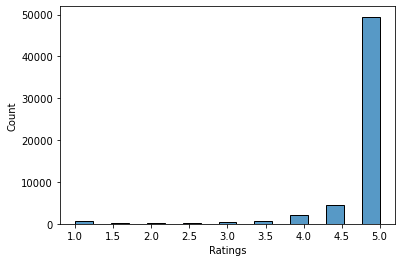

In [18]:
sns.histplot(data.Ratings)

### 3.2 ANALYSIS OF CATEGORICAL VARIABLE - COUNTRY

In [19]:
data['Country'].value_counts()

India                   58268
United Arab Emirates      375
Name: Country, dtype: int64

<AxesSubplot:ylabel='Ratings'>

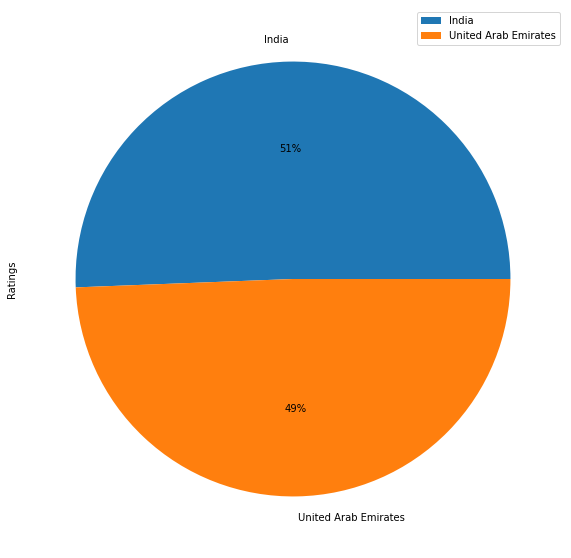

In [20]:
data.groupby(['Country']).mean().plot(kind='pie', y='Ratings',figsize=(10,10), autopct='%1.0f%%')

<AxesSubplot:xlabel='Ratings', ylabel='Country'>

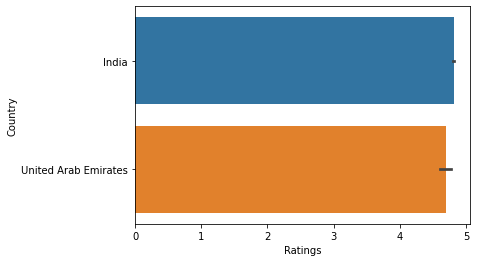

In [21]:
sns.barplot(x = 'Ratings',y = 'Country',data = data)

### 3.3 ANALYSIS OF CATEGORICAL VARIABLE - SERVICES

In [22]:
data['Services'].value_counts()

AC Service and Repair Professionals                   31596
Beauty Service Professionals                           5519
Electricians                                           2745
Carpenters                                             2730
Plumbers                                               2688
Massage Therapists At Home For Women                   2208
RO and Water Purifier Repair Service Professionals     1521
Washing Machine Repair Professionals                   1444
Home Cleaning Service Professionals                    1384
Sofa Cleaning Service Professionals                    1228
Pest Control Services                                  1085
Fridge Repair Service Professionals                    1077
Massage Therapists At Home For Men                     1041
TV Repair Service Professionals                         471
Chimney and Hob Repair Service Professionals            388
Microwave Repair Professionals                          340
Part-time Maids                         

In [23]:
data.groupby(['Services']).mean()

,Ratings
Services,
AC Service and Repair Professionals,4.821212
Bathroom Cleaning Service Professionals,4.750000
Beauty Service Professionals,4.771335
Carpenters,4.800183
Carpet Cleaning Service Professionals,4.900000
Chimney and Hob Repair Service Professionals,4.798969
Cooks,5.000000
Electricians,4.802914
Fridge Repair Service Professionals,4.799443


In [24]:
data.groupby(['Country', 'Services']).mean()

Ratings
Country              Services                                                    
India                AC Service and Repair Professionals                 4.821212
                     Bathroom Cleaning Service Professionals             4.750000
                     Beauty Service Professionals                        4.771335
                     Carpenters                                          4.800183
                     Carpet Cleaning Service Professionals               4.900000
                     Chimney and Hob Repair Service Professionals        4.798969
                     Cooks                                               5.000000
                     Electricians                                        4.805403
                     Fridge Repair Service Professionals                 4.799443
                     Geyser Repair Professionals                         4.750000
                     Home Cleaning Service Professionals                 4.812861
                     Kitchen Cleaning Service Professionals              4.815789
                     Massage Therapists At Home For Men                  4.863112
                     Massage Therapists At Home For Women                4.771513
                     Microwave Repair Professionals                      4.860294
                     Party Make-up Artists                               4.750000
                     Pest Control Services                               4.846863
                     Plumbers                                            4.794370
                     Professional Car Cleaning Service Professionals     4.857955
                     RO and Water Purifier Repair Service Professionals  4.845496
                     Sofa Cleaning Service Professionals                 4.831840
                     Spa at Home for Women                               4.735294
                     TV Repair Service Professionals                     4.870488
                     Wall Painters                                       4.735897
                     Washing Machine Repair Professionals                4.830332
United Arab Emirates Electricians                                        3.666667
                     Handyman Services                                   4.833333
                     Home Cleaning Services                              4.450000
                     Part-time Maids                                     4.710682
                     Pest Control Services                               5.000000
                     Plumbers                                            4.916667

### 3.4 ANALYSIS OF CATEGORICAL VARIABLE - SENTIMENTS

In [25]:
data['sentiment'].value_counts()

Positive    56144
Negative     1301
Average      1198
Name: sentiment, dtype: int64

In [26]:
data.groupby(['sentiment']).mean()

,Ratings
sentiment,
Average,3.274624
Negative,1.483859
Positive,4.922182


In [27]:
pd.crosstab(data['sentiment'], data['Country'])

Country,India,United Arab Emirates
sentiment,,
Average,1188,10
Negative,1282,19
Positive,55798,346


<AxesSubplot:xlabel='sentiment'>

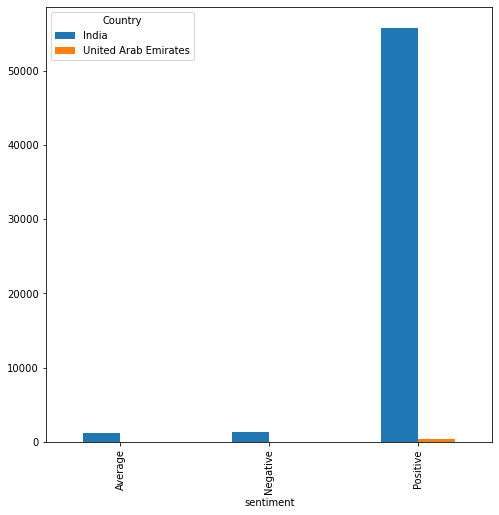

In [28]:
senticountry_table= pd.crosstab(index=data.sentiment,columns=data['Country'])
senticountry_table.plot(kind="bar",figsize=(8,8), stacked=False)

<AxesSubplot:ylabel='Ratings'>

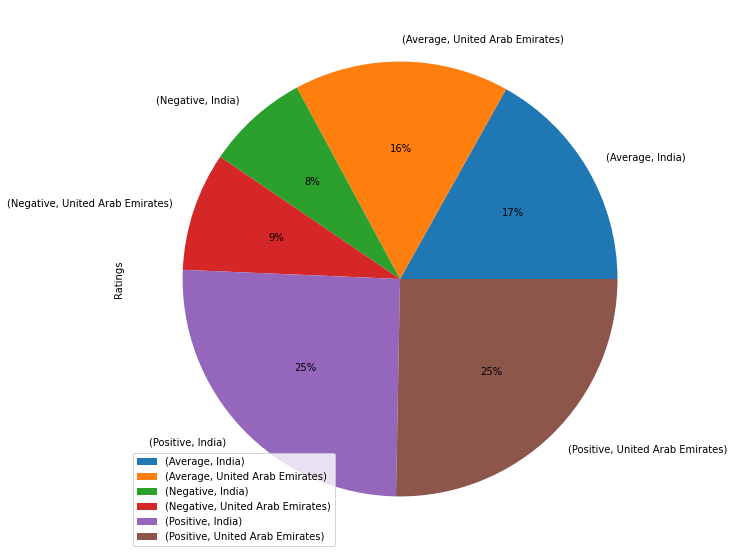

In [29]:
data.groupby(['sentiment', 'Country']).mean().plot(kind='pie', y='Ratings',figsize=(10,10), autopct='%1.0f%%')

In [30]:
data.groupby(['sentiment', 'Country']).mean()

Ratings
sentiment Country                       
Average   India                 3.276094
          United Arab Emirates  3.100000
Negative  India                 1.480499
          United Arab Emirates  1.710526
Positive  India                 4.922282
          United Arab Emirates  4.906069

In [31]:
pd.crosstab(data['sentiment'], data['Services'])

Services,AC Service and Repair Professionals,Bathroom Cleaning Service Professionals,Beauty Service Professionals,Carpenters,Carpet Cleaning Service Professionals,Chimney and Hob Repair Service Professionals,Cooks,Electricians,Fridge Repair Service Professionals,Geyser Repair Professionals,...,Party Make-up Artists,Pest Control Services,Plumbers,Professional Car Cleaning Service Professionals,RO and Water Purifier Repair Service Professionals,Sofa Cleaning Service Professionals,Spa at Home for Women,TV Repair Service Professionals,Wall Painters,Washing Machine Repair Professionals
sentiment,,,,,,,,,,,,,,,,,,,,,
Average,571,0,165,67,0,11,0,66,8,4,...,0,14,64,3,15,21,8,8,8,34
Negative,677,0,142,61,0,8,0,59,34,12,...,3,18,67,1,30,24,4,5,6,26
Positive,30348,8,5212,2602,5,369,12,2620,1035,290,...,27,1053,2557,84,1476,1183,141,458,181,1384


### 3.5 ANALYSIS OF CATEGORICAL VARIABLE - CITY

In [32]:
data['City'].value_counts()

New Delhi        8684
Hyderabad        7544
Mumbai           7159
Bangalore        6702
Kolkata          5100
Pune             3931
Chennai          3930
Gurgaon          3644
Noida            2959
Ghaziabad        2105
Ahmedabad        2104
Thane            1623
Secunderabad     1074
Greater Noida     864
Faridabad         845
Dubai             375
Name: City, dtype: int64

In [33]:
pd.pivot_table(data, index='City', values="Ratings", aggfunc= 'mean')

,Ratings
City,
Ahmedabad,4.822006
Bangalore,4.811474
Chennai,4.828372
Dubai,4.696000
Faridabad,4.836686
Ghaziabad,4.803088
Greater Noida,4.839699
Gurgaon,4.789517
Hyderabad,4.795732


<AxesSubplot:xlabel='Ratings', ylabel='City'>

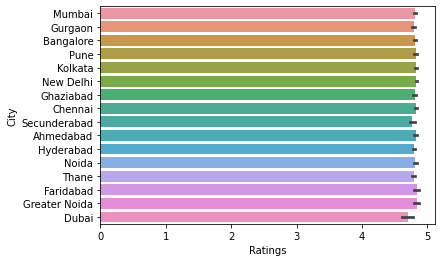

In [34]:
sns.barplot(x = 'Ratings',y = 'City',data = data)

In [35]:
pd.pivot_table(data, index='City', values="Services", aggfunc='count')

,Services
City,
Ahmedabad,2104
Bangalore,6702
Chennai,3930
Dubai,375
Faridabad,845
Ghaziabad,2105
Greater Noida,864
Gurgaon,3644
Hyderabad,7544


In [36]:
pd.crosstab(data['Services'], data['City'])

City,Ahmedabad,Bangalore,Chennai,Dubai,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Hyderabad,Kolkata,Mumbai,New Delhi,Noida,Pune,Secunderabad,Thane
Services,,,,,,,,,,,,,,,,
AC Service and Repair Professionals,1467,1063,1998,0,587,1579,642,2225,3815,3366,3971,5849,1998,1526,543,967
Bathroom Cleaning Service Professionals,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beauty Service Professionals,217,1163,188,0,70,114,63,339,576,338,768,710,205,546,81,141
Carpenters,69,544,238,0,24,45,21,185,496,133,314,225,87,263,47,39
Carpet Cleaning Service Professionals,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0
Chimney and Hob Repair Service Professionals,0,75,37,0,9,31,9,14,0,83,31,58,35,0,0,6
Cooks,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Electricians,40,710,367,6,20,22,11,106,476,143,275,243,48,182,58,38
Fridge Repair Service Professionals,30,138,94,0,9,30,2,26,157,114,110,207,41,64,22,33


In [37]:
data.groupby(['sentiment', 'City']).mean()

Ratings
sentiment City                   
Average   Ahmedabad      3.324324
          Bangalore      3.292308
          Chennai        3.258621
          Dubai          3.100000
          Faridabad      3.210526
          Ghaziabad      3.294872
          Greater Noida  3.272727
          Gurgaon        3.274390
          Hyderabad      3.247024
          Kolkata        3.315476
          Mumbai         3.288360
          New Delhi      3.238255
          Noida          3.265152
          Pune           3.297297
          Secunderabad   3.300000
          Thane          3.304878
Negative  Ahmedabad      1.489796
          Bangalore      1.523649
          Chennai        1.464286
          Dubai          1.710526
          Faridabad      1.583333
          Ghaziabad      1.375000
          Greater Noida  1.464286
          Gurgaon        1.622727
          Hyderabad      1.477157
          Kolkata        1.485149
          Mumbai         1.439024
          New Delhi      1.414365
          Noida          1.387324
          Pune           1.531646
          Secunderabad   1.375000
          Thane          1.635135
Positive  Ahmedabad      4.930377
          Bangalore      4.917964
          Chennai        4.914256
          Dubai          4.906069
          Faridabad      4.947401
          Ghaziabad      4.927861
          Greater Noida  4.938406
          Gurgaon        4.926419
          Hyderabad      4.923039
          Kolkata        4.921160
          Mumbai         4.908938
          New Delhi      4.932966
          Noida          4.938342
          Pune           4.918078
          Secunderabad   4.908465
          Thane          4.902589

In [38]:
pd.crosstab(data['sentiment'], data['City'])

City,Ahmedabad,Bangalore,Chennai,Dubai,Faridabad,Ghaziabad,Greater Noida,Gurgaon,Hyderabad,Kolkata,Mumbai,New Delhi,Noida,Pune,Secunderabad,Thane
sentiment,,,,,,,,,,,,,,,,
Average,37,130,58,10,19,39,22,82,168,84,189,149,66,74,30,41
Negative,49,148,70,19,18,56,14,110,197,101,123,181,71,79,28,37
Positive,2018,6424,3802,346,808,2010,828,3452,7179,4915,6847,8354,2822,3778,1016,1545


<AxesSubplot:xlabel='sentiment'>

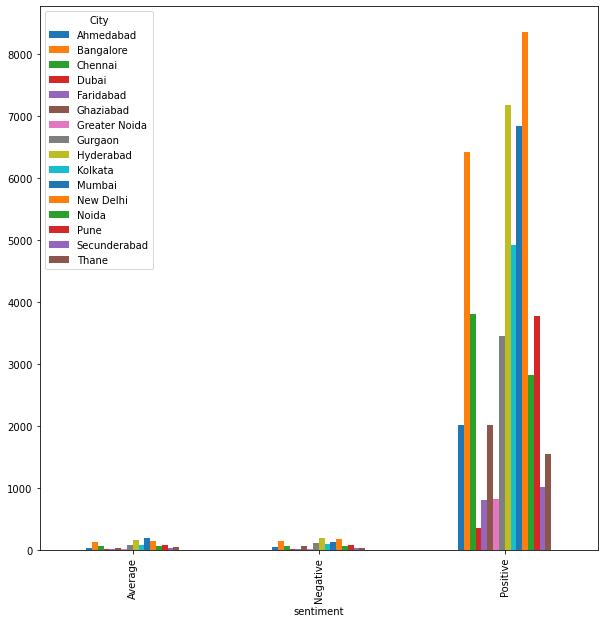

In [39]:
senticity_table= pd.crosstab(index=data.sentiment,columns=data['City'])
senticity_table.plot(kind="bar",figsize=(10,10), stacked=False)